In [45]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', names=range(0, 55))
df = raw_df.sample(10000, random_state=8) # Sampling so computing doesn't take as long

In [52]:
X = df[range(0, 54)].to_numpy()
y = df[54].to_numpy()

In [53]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(y.reshape(-1, 1))

y = encoded_labels.toarray()

y.shape

((10000, 7), (2000, 7))

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

(8000, 54)
(2000, 54)


In [55]:
y_test.shape, y_train.shape

((2000, 7), (8000, 7))

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(neurons=64, activation_1='linear', activation_2='linear', optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=54, activation=activation_1))
    model.add(Dense(neurons/2, activation=activation_2))
    model.add(Dense(round(neurons/3), activation=activation_2))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [21]:
neurons = [100, 64, 32]
activation_1 = ['relu', 'tanh', 'sigmoid','linear']
activation_2 = ['relu', 'tanh', 'sigmoid','linear']
optimizer = ['SGD', 'Adam']

param_grid = dict(neurons=neurons,
                  activation_1=activation_1,
                  activation_2=activation_2,
                  optimizer=optimizer)

In [22]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(model=create_model, batch_size=20, epochs=100, verbose=1,
                        neurons=neurons, activation_1=activation_1, activation_2=activation_2,
                        optimizer=optimizer)
                        

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

grid_result = grid.fit(X_train[:500], y_train[:500])

2023-04-14 19:43:54.928708: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.017051: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.048362: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.048493: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.071092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.085166: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.094272: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 19:43:55.123729: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-

Epoch 1/100
Epoch 1/100
Epoch 1/100


2023-04-14 19:43:56.294928: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 19:43:56.434611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 19:43:56.462073: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 89.0892 - accuracy: 0.3150
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 15.2324 - accuracy: 0.4675
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 8.1991 - accuracy: 0.4250
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 5.8943 - accuracy: 0.4275
Epoch 5/100
20/20 [==============================] - 1s 2ms/step - loss: 96.5550 - accuracy: 0.3125
Epoch 2/100
20/20 [==============================] - 1s 2ms/step - loss: 56.3197 - accuracy: 0.3425
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 4.3600 - accuracy: 0.4150
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 22.7928 - accuracy: 0.4125
Epoch 3/100
20/20 [================

KeyboardInterrupt: 

Epoch 21/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6905 - accuracy: 0.4125
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0085 - accuracy: 0.5950
Epoch 61/100
20/20 [==============================] - 0s 3ms/step - loss: 0.9935 - accuracy: 0.5475
Epoch 61/100
Epoch 73/100
20/20 [==============================] - 0s 1ms/step - loss: 1.1795 - accuracy: 0.5025
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0439 - accuracy: 0.5625
Epoch 42/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.5375
Epoch 21/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.5925
Epoch 60/100
20/20 [==============================] - 0s 3ms/step - loss: 1.3196 - accuracy: 0.5200
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0755 - accuracy: 0.5600
Epoch 22/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0045 - accura

In [ ]:
params = grid_result.best_params_

grid_result.best_score_, grid_result.best_params_

(0.650375,
 {'activation_1': 'linear',
  'activation_2': 'linear',
  'neurons': 64,
  'optimizer': 'Adam'})

In [ ]:
# Now lets find best batch size and epochs

batch_size = [10, 25, 50]
epochs = [50, 100, 200]
param_grid_2 = dict(batch_size=batch_size, epochs=epochs)


In [ ]:
model_2 = KerasClassifier(model=create_model, activation_1=params['activation_1'],
                                              activation_2=params['activation_2'],
                                              neurons=params['neurons'],
                                              optimizer=params['optimizer'],
                                              verbose=1)

grid_2 = GridSearchCV(estimator=model_2, param_grid=param_grid_2, n_jobs=-1, cv=3)
grid_result_2 = grid_2.fit(X_train, y_train)

Epoch 1/200
Epoch 1/50
Epoch 1/100
Epoch 1/50
Epoch 1/50
Epoch 1/200
Epoch 1/50
Epoch 1/50
Epoch 1/100
Epoch 1/200
Epoch 1/100
Epoch 1/200
Epoch 1/50
Epoch 1/100
Epoch 1/200
Epoch 1/50
Epoch 1/50
Epoch 1/200
Epoch 1/100
Epoch 1/100
253/534 [=============>................] - ETA: 0s - loss: 63.4966 - accuracy: 0.3617Epoch 3/50
Epoch 2/100
214/214 [==============================] - 1s 2ms/step - loss: 61.9123 - accuracy: 0.4341
Epoch 2/200
107/107 [==============================] - 0s 2ms/step - loss: 13.8196 - accuracy: 0.4695
Epoch 2/100
214/214 [==============================] - 1s 3ms/step - loss: 23.9583 - accuracy: 0.4214
Epoch 3/100
214/214 [==============================] - 0s 2ms/step - loss: 17.4352 - accuracy: 0.4573
Epoch 3/50
Epoch 3/200
214/214 [==============================] - 1s 2ms/step - loss: 21.5366 - accuracy: 0.4432
Epoch 3/200
214/214 [==============================] - 0s 2ms/step - loss: 25.8847 - accuracy: 0.4618
Epoch 3/200
107/107 [============================

In [ ]:
params_2 = grid_result_2.best_params_
grid_result_2.best_score_, grid_result_2.best_params_

(0.6750006774284497, {'batch_size': 10, 'epochs': 200})

Best model

In [58]:
# Lets sample another 2000 samples from dataset for eval, exluding the ones we sampled before

merged_df = pd.merge(raw_df, df, how='outer', indicator=True)
eval_df = merged_df[merged_df['_merge'] == 'left_only'][raw_df.columns]
eval_df = eval_df.sample(2000, random_state=23)

X_eval = eval_df[range(0, 54)].to_numpy()
y_eval = eval_df[54].to_numpy()

encoded_val_labels = encoder.fit_transform(y_eval.reshape(-1, 1))
y_eval = encoded_val_labels.toarray()

y_eval.shape

(2000, 7)

In [56]:
from sklearn.metrics import accuracy_score

best_model = create_model(activation_1=params['activation_1'],
                           activation_2=params['activation_2'],
                           neurons=params['neurons'],
                           optimizer=params['optimizer'])

history = best_model.fit(X_train, y_train, validation_data=(X_eval, y_eval), verbose=0, epochs=params_2['epochs'], batch_size=params_2['batch_size'])

pred = best_model.predict(X_test)

63/63 [==============================] - 0s 425us/step


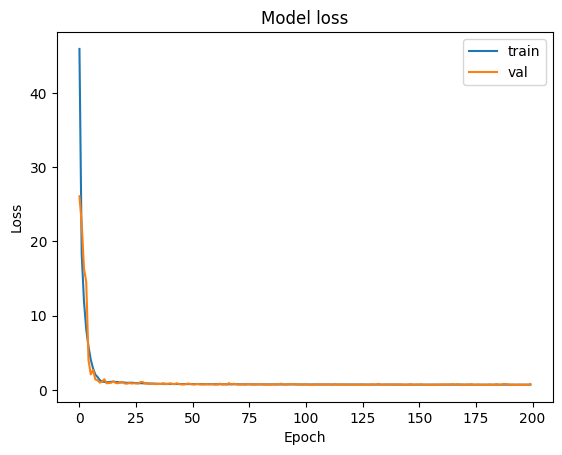

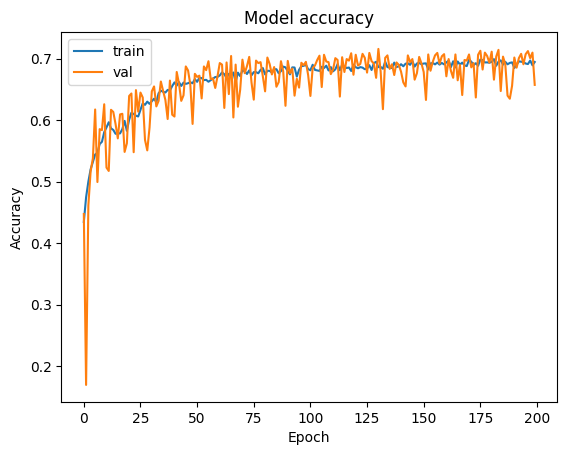

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot the accuracy curves for both the train and validation sets
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [26]:
# Accuracy would definitly improve with bigger sample size
# and hyperparameter grid search with bigger amount of variants
# This is obviously only presentation, since I didn't have enough time for longer training.

accuracy_score(np.round(pred), y_test)


0.676

Saving model


In [ ]:
# Fitting all 10 000 samples to the model, so the training content is consistant with shallow models

final_model = create_model(activation_1=params['activation_1'],
                           activation_2=params['activation_2'],
                           neurons=params['neurons'],
                           optimizer=params['optimizer'])

final_model.fit(X, y, verbose=0, epochs=params_2['epochs'], batch_size=params_2['batch_size'])

In [ ]:
final_model.save('NN_clf')

INFO:tensorflow:Assets written to: NN_clf/assets


INFO:tensorflow:Assets written to: NN_clf/assets
